# Book: Hands on TinyML
 Chapter 05-01
## TensorFlow Lite with mnist-fashion

In [21]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

Load Fashion_MNIST database

In [22]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Plot random image samples

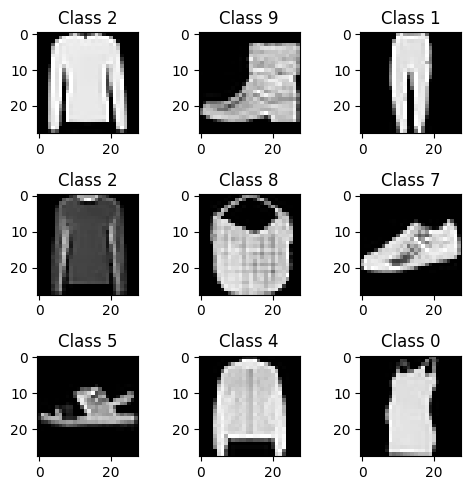

In [23]:
plt.rcParams['figure.figsize'] = (5,5)

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()
plt.show()

Data pre-processing

In [24]:
num_class = 10
X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize the input
X_test /= 255

X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_test.shape[2], 1)

y_train = to_categorical(y_train, num_class)
y_test = to_categorical(y_test, num_class)

Model definition the baseline model

In [25]:
model = Sequential()      
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(100, activation = "relu"))
model.add(Dense(num_class, activation="softmax"))

/home/cacc/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,926 (702.84 KB)

 Trainable params: 179,926 (702.84 KB)

 Non-trainable params: 0 (0.00 B)

Configure and train the baseline model

In [27]:
opt = Adam(0.002)
model.compile(loss="categorical_crossentropy", optimizer = opt, metrics=["accuracy"])

In [28]:
model.fit(X_train, y_train, batch_size=128, epochs=15)

Epoch 1/15
458/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7270 - loss: 0.7585

2025-09-29 19:10:07.867927: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_647', 4 bytes spill stores, 4 bytes spill loads



469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7990 - loss: 0.5499
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8616 - loss: 0.3777
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8759 - loss: 0.3347
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8884 - loss: 0.3046
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8935 - loss: 0.2875
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8985 - loss: 0.2677
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9038 - loss: 0.2586
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9076 - loss: 0.2440
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9101 - loss: 0.2363
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9151 - loss: 0.2281
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9154 - loss: 0.2234
Epoch 12/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

Evaluate on test set

In [29]:
score = model.evaluate(X_test, y_test)
print('accuracy on test data:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9130 - loss: 0.2414
accuracy on test data: 0.9129999876022339


Save the TF model

In [30]:
model.save('baseline_model.h5')

Load the model 

In [31]:
from tensorflow.keras.models import load_model
baseline_model = load_model('baseline_model.h5')

Convert it into an Equivalent TFLite model

In [32]:
converter = tf.lite.TFLiteConverter.from_keras_model(baseline_model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpztplfpsc/assets


INFO:tensorflow:Assets written to: /tmp/tmpztplfpsc/assets


Saved artifact at '/tmp/tmpztplfpsc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  134187043673664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134187054037328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134187054033808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134187053416144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134187053401184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134187053320672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134187053320496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134187053322432: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1759144224.284660   10264 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1759144224.284676   10264 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-09-29 19:10:24.284780: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpztplfpsc
2025-09-29 19:10:24.285123: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-09-29 19:10:24.285127: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpztplfpsc
2025-09-29 19:10:24.287579: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-09-29 19:10:24.306713: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpztplfpsc
2025-09-29 19:10:24.311995: I tensorflow/cc/saved_model/loader.cc:471] SavedModel load for tags { serve }; Status: success: OK. Took 27217 microseconds.


Save the TFLite model in your workspace

In [33]:
import pathlib

tflite_models_dir = pathlib.Path("./tflite_models/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)
tflite_model_file = tflite_models_dir/"model.tflite"
tflite_model_file.write_bytes(tflite_model)

723844

You can also export a TensorFlow model as a concrete function

In [34]:
# export model as  a concrete function
func = tf.function(baseline_model).get_concrete_function(
    tf.TensorSpec(baseline_model.inputs[0].shape, baseline_model.inputs[0].dtype))
# serialized graph representation of the concrte function
func.graph.as_graph_def()
# converting the concrete function to TfLite 
converter =  tf.lite.TFLiteConverter.from_concrete_functions([func])
tflite_model = converter.convert()

I0000 00:00:1759144224.421954   10264 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
I0000 00:00:1759144224.422103   10264 single_machine.cc:376] Starting new session
I0000 00:00:1759144224.422861   10264 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6291 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9
W0000 00:00:1759144224.460053   10264 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1759144224.460072   10264 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.


Prediction on the test set using the TFLite model

In [35]:
tflite_model_file = 'tflite_models/model.tflite'          
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

pred_list = []
for images in X_test:
  input_data = np.array(images, dtype=np.float32)

  input_data = input_data.reshape(1, input_data.shape[0], input_data.shape[1], 1)

  interpreter.set_tensor(input_index, input_data)
  interpreter.invoke()
  prediction = interpreter.get_tensor(output_index)
  prediction = np.argmax(prediction)
  pred_list.append(prediction)

accurate_count = 0
for index in range(len(pred_list)):
  if pred_list[index] == np.argmax(y_test[index]):
      accurate_count += 1
accuracy = accurate_count * 1.0 / len(pred_list)

print('accuracy = ', accuracy)

/home/cacc/miniconda3/envs/ml/lib/python3.10/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


accuracy =  0.913


Post training quantization

In [36]:
converter = tf.lite.TFLiteConverter.from_keras_model(baseline_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model_ptq = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp8yqslok7/assets


INFO:tensorflow:Assets written to: /tmp/tmp8yqslok7/assets


Saved artifact at '/tmp/tmp8yqslok7'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  134187043673664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134187054037328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134187054033808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134187053416144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134187053401184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134187053320672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134187053320496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134187053322432: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1759144225.286422   10264 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1759144225.286440   10264 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-09-29 19:10:25.286566: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp8yqslok7
2025-09-29 19:10:25.287011: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-09-29 19:10:25.287016: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp8yqslok7
2025-09-29 19:10:25.290251: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-09-29 19:10:25.307768: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp8yqslok7
2025-09-29 19:10:25.312700: I tensorflow/cc/saved_model/loader.cc:471] SavedModel load for tags { serve }; Status: success: OK. Took 26136 microseconds.


Save the model after post-training quantization

In [37]:
tflite_models_dir = pathlib.Path("./tflite_models/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)
tflite_model_file = tflite_models_dir/"model_ptq.tflite"
tflite_model_file.write_bytes(tflite_model_ptq)

190440

Evaluate the model performance 

In [38]:
tflite_model_file = 'tflite_models/model_ptq.tflite'          
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

pred_list = []
for images in X_test:
  input_data = np.array(images, dtype=np.float32)

  input_data = input_data.reshape(1, input_data.shape[0], input_data.shape[1], 1)

  interpreter.set_tensor(input_index, input_data)
  interpreter.invoke()
  prediction = interpreter.get_tensor(output_index)
  prediction = np.argmax(prediction)
  pred_list.append(prediction)

accurate_count = 0
for index in range(len(pred_list)):
  if pred_list[index] == np.argmax(y_test[index]):
      accurate_count += 1
accuracy = accurate_count * 1.0 / len(pred_list)

print(accuracy)

/home/cacc/miniconda3/envs/ml/lib/python3.10/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


0.9128


Install the package for TensorFlow Model Optimization

In [39]:
 !pip install -q tensorflow-model-optimization

Quantization aware training

In [ ]:
import tensorflow_model_optimization as tfmot

baseline_model = load_model('baseline_model.h5')

quantized_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
q_aware_model = quantized_model(baseline_model)

# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

q_aware_model.summary()

ValueError: `to_quantize` can only either be a keras Sequential or Functional model.

Require a retraining

In [ ]:
q_aware_model.fit(X_train, y_train,
                  batch_size=500, epochs=2, validation_split=0.1)

Epoch 1/2


/usr/local/lib/python3.9/dist-packages/keras/src/backend.py:5562: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


108/108 [==============================] - 10s 80ms/step - loss: 0.1949 - accuracy: 0.9276 - val_loss: 0.1506 - val_accuracy: 0.9433
Epoch 2/2
108/108 [==============================] - 8s 76ms/step - loss: 0.1811 - accuracy: 0.9323 - val_loss: 0.1479 - val_accuracy: 0.9443


Convert and save the model as a TFLite file

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model_qat = converter.convert()

tflite_models_dir = pathlib.Path("./tflite_models/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)
tflite_model_file = tflite_models_dir/"model_qat.tflite"
tflite_model_file.write_bytes(tflite_model_qat)

INFO:tensorflow:Assets written to: /tmp/tmpf5_vbtxo/assets


INFO:tensorflow:Assets written to: /tmp/tmpf5_vbtxo/assets
/usr/local/lib/python3.9/dist-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2025-08-24 07:33:26.645506: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2025-08-24 07:33:26.645543: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-08-24 07:33:26.645823: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpf5_vbtxo
2025-08-24 07:33:26.649420: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2025-08-24 07:33:26.649447: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpf5_vbtxo
2025-08-24 07:33:26.662267: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2025-08-24 07:33:26.768103: I te

187792

Evalaute on the test set

In [ ]:
tflite_model_file = 'tflite_models/model_qat.tflite'          
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

pred_list = []
for images in X_test:
  input_data = np.array(images, dtype=np.float32)

  input_data = input_data.reshape(1, input_data.shape[0], input_data.shape[1], 1)

  interpreter.set_tensor(input_index, input_data)
  interpreter.invoke()
  prediction = interpreter.get_tensor(output_index)
  prediction = np.argmax(prediction)
  pred_list.append(prediction)

accurate_count = 0
for index in range(len(pred_list)):
  if pred_list[index] == np.argmax(y_test[index]):
      accurate_count += 1
accuracy = accurate_count * 1.0 / len(pred_list)

print('accuracy = ', accuracy)

accuracy =  0.9215


Selective quantization only on dense layers

In [ ]:
baseline_model = load_model('baseline_model.h5')

def apply_quantization(layer):
      if isinstance(layer, tf.keras.layers.Dense):
        return tfmot.quantization.keras.quantize_annotate_layer(layer)
      return layer
annotated_model = tf.keras.models.clone_model(baseline_model,clone_function=apply_quantization,)
q_aware_model_dense = tfmot.quantization.keras.quantize_apply(annotated_model)
q_aware_model_dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 quant_dropout (QuantizeWra  (None, 1600)              1

In [ ]:
q_aware_model_dense.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

q_aware_model_dense.fit(X_train, y_train,
                  batch_size=500, epochs=2, validation_split=0.1)

Epoch 1/2


/usr/local/lib/python3.9/dist-packages/keras/src/backend.py:5562: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


108/108 [==============================] - 7s 54ms/step - loss: 0.1898 - accuracy: 0.9306 - val_loss: 0.1465 - val_accuracy: 0.9465
Epoch 2/2
108/108 [==============================] - 6s 52ms/step - loss: 0.1765 - accuracy: 0.9338 - val_loss: 0.1475 - val_accuracy: 0.9455


Weight pruning based optimization

In [ ]:
baseline_model = load_model('baseline_model.h5')

Apply a pruning scheduler

In [ ]:
import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

batch_size = 128
epochs = 2
validation_split = 0.1 # 10% of training set will be used for validation set. 

num_samples = X_train.shape[0] * (1 - validation_split)
end_step = np.ceil(num_samples / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.40,
                                                               final_sparsity=0.75,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_for_pruning = prune_low_magnitude(baseline_model, **pruning_params)

# `prune_low_magnitude` requires a recompile.
model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_for_pruning.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d  (None, 26, 26, 32)        610       
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_max_po  (None, 13, 13, 32)        1         
 oling2d (PruneLowMagnitude                                      
 )                                                               
                                                                 
 prune_low_magnitude_conv2d  (None, 11, 11, 64)        36930     
 _1 (PruneLowMagnitude)                                          
                                                                 
 prune_low_magnitude_max_po  (None, 5, 5, 64)          1         
 oling2d_1 (PruneLowMagnitu                                      
 de)                                                    

Train the model

In [ ]:
import tempfile


log_dir = tempfile.mkdtemp()
callbacks = [
    tfmot.sparsity.keras.UpdatePruningStep(),
    tfmot.sparsity.keras.PruningSummaries(log_dir=log_dir)
]

model_for_pruning.fit(X_train, y_train,
                  batch_size=batch_size, epochs=epochs, validation_split=validation_split,
                  callbacks=callbacks)

Epoch 1/2
422/422 [==============================] - 11s 18ms/step - loss: 0.2685 - accuracy: 0.8989 - val_loss: 0.2596 - val_accuracy: 0.9008
Epoch 2/2
422/422 [==============================] - 7s 17ms/step - loss: 0.2794 - accuracy: 0.8958 - val_loss: 0.2401 - val_accuracy: 0.9090


Export and save the model

In [ ]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
tflite_model_pruned = converter.convert()

import pathlib
tflite_models_dir = pathlib.Path("./tflite_models/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)
tflite_model_file = tflite_models_dir/"model_pruned.tflite"
tflite_model_file.write_bytes(tflite_model_pruned)


INFO:tensorflow:Assets written to: /tmp/tmprmq_a0mf/assets


INFO:tensorflow:Assets written to: /tmp/tmprmq_a0mf/assets
2025-08-24 07:39:56.613375: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2025-08-24 07:39:56.613410: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-08-24 07:39:56.613636: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmprmq_a0mf
2025-08-24 07:39:56.614789: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2025-08-24 07:39:56.614818: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmprmq_a0mf
2025-08-24 07:39:56.617567: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2025-08-24 07:39:56.642037: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmprmq_a0mf
2025-08-24 07:39:56.651589: I tensorflow/cc/saved_model/loader.cc:314] SavedModel

723104

Evaluate on the test set

In [ ]:
tflite_model_file = 'tflite_models/model_pruned.tflite'          
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

pred_list = []
for images in X_test:
  input_data = np.array(images, dtype=np.float32)

  input_data = input_data.reshape(1, input_data.shape[0], input_data.shape[1], 1)

  interpreter.set_tensor(input_index, input_data)
  interpreter.invoke()
  prediction = interpreter.get_tensor(output_index)
  prediction = np.argmax(prediction)
  pred_list.append(prediction)

accurate_count = 0
for index in range(len(pred_list)):
  if pred_list[index] == np.argmax(y_test[index]):
      accurate_count += 1
accuracy = accurate_count * 1.0 / len(pred_list)

print(accuracy)

0.8961


Save model file in a compressed zip format

In [ ]:
def get_gzipped_model(file):
  import os
  import zipfile
  import tempfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

print("Size of compresssed baseline model: %.2f bytes" % (get_gzipped_model('tflite_models/model.tflite')))

print("Size of zipped pruned TFlite model: %.2f bytes" % (get_gzipped_model('tflite_models/model_pruned.tflite')))


Size of compresssed baseline model: 670789.00 bytes
Size of zipped pruned TFlite model: 245796.00 bytes


Selective pruning only to the dense layers

In [ ]:
baseline_model = load_model('baseline_model.h5')
def apply_pruning(layer):
  if isinstance(layer, tf.keras.layers.Dense):
    return tfmot.sparsity.keras.prune_low_magnitude(layer)
  return layer

model_for_pruning = tf.keras.models.clone_model(
    baseline_model,
    clone_function=apply_pruning)

model_for_pruning.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
model_for_pruning.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

log_dir = tempfile.mkdtemp()
callbacks = [
    tfmot.sparsity.keras.UpdatePruningStep(),
    tfmot.sparsity.keras.PruningSummaries(log_dir=log_dir)
]

model_for_pruning.fit(X_train, y_train,
                  batch_size=batch_size, epochs=epochs, validation_split=validation_split,
                  callbacks=callbacks)

Epoch 1/2


/usr/local/lib/python3.9/dist-packages/keras/src/backend.py:5562: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


422/422 [==============================] - 9s 17ms/step - loss: 0.2000 - accuracy: 0.9248 - val_loss: 0.1559 - val_accuracy: 0.9412
Epoch 2/2
422/422 [==============================] - 7s 17ms/step - loss: 0.1910 - accuracy: 0.9278 - val_loss: 0.1611 - val_accuracy: 0.9380


In [ ]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
tflite_model_pruned_dense = converter.convert()

tflite_models_dir = pathlib.Path("./tflite_models/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)
tflite_model_file = tflite_models_dir/"model_pruned_dense.tflite"
tflite_model_file.write_bytes(tflite_model_pruned_dense)

INFO:tensorflow:Assets written to: /tmp/tmpdo99qwpr/assets


INFO:tensorflow:Assets written to: /tmp/tmpdo99qwpr/assets
2025-08-24 07:40:36.922505: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2025-08-24 07:40:36.922542: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-08-24 07:40:36.922791: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpdo99qwpr
2025-08-24 07:40:36.924038: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2025-08-24 07:40:36.924062: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpdo99qwpr
2025-08-24 07:40:36.927050: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2025-08-24 07:40:36.952173: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmpdo99qwpr
2025-08-24 07:40:36.962136: I tensorflow/cc/saved_model/loader.cc:314] SavedModel

723104

Check compressed model size

In [ ]:
print("Size of compresssed baseline model: %.2f bytes" % (get_gzipped_model('tflite_models/model.tflite')))

print("Size of zipped pruned TFlite model: %.2f bytes" % (get_gzipped_model('tflite_models/model_pruned.tflite')))

print("Size of zipped pruned TFlite model only dense layers: %.2f bytes" % (get_gzipped_model('tflite_models/model_pruned_dense.tflite')))

Size of compresssed baseline model: 670789.00 bytes
Size of zipped pruned TFlite model: 245796.00 bytes
Size of zipped pruned TFlite model only dense layers: 439992.00 bytes


Check the model performance where only the dense layers are pruned

In [ ]:
tflite_model_file = 'tflite_models/model_pruned_dense.tflite'          
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

pred_list = []
for images in X_test:
  input_data = np.array(images, dtype=np.float32)

  input_data = input_data.reshape(1, input_data.shape[0], input_data.shape[1], 1)

  interpreter.set_tensor(input_index, input_data)
  interpreter.invoke()
  prediction = interpreter.get_tensor(output_index)
  prediction = np.argmax(prediction)
  pred_list.append(prediction)

accurate_count = 0
for index in range(len(pred_list)):
  if pred_list[index] == np.argmax(y_test[index]):
      accurate_count += 1
accuracy = accurate_count * 1.0 / len(pred_list)

print('accuracy = ', accuracy)

accuracy =  0.9207


Optimization using weight clustering

In [ ]:
baseline_model = load_model('baseline_model.h5')

cluster_weights = tfmot.clustering.keras.cluster_weights
CentroidInitialization = tfmot.clustering.keras.CentroidInitialization

clustering_params = {
  'number_of_clusters': 16,
  'cluster_centroids_init': CentroidInitialization.KMEANS_PLUS_PLUS
}

# Cluster a whole model
clustered_model = cluster_weights(baseline_model, **clustering_params)

# Use smaller learning rate for fine-tuning clustered model
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)

clustered_model.compile(
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
  optimizer=opt,
  metrics=['accuracy'])

clustered_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cluster_conv2d (ClusterWei  (None, 26, 26, 32)        624       
 ghts)                                                           
                                                                 
 cluster_max_pooling2d (Clu  (None, 13, 13, 32)        0         
 sterWeights)                                                    
                                                                 
 cluster_conv2d_1 (ClusterW  (None, 11, 11, 64)        36944     
 eights)                                                         
                                                                 
 cluster_max_pooling2d_1 (C  (None, 5, 5, 64)          0         
 lusterWeights)                                                  
                                                                 
 cluster_flatten (ClusterWe  (None, 1600)              0

Train the model

In [ ]:
# Fine-tune model
clustered_model.fit(
  X_train,
  y_train,
  batch_size=128,
  epochs=2,
  validation_split=0.1)

Epoch 1/2
422/422 [==============================] - 10s 21ms/step - loss: 0.1638 - accuracy: 0.9401 - val_loss: 0.1553 - val_accuracy: 0.9412
Epoch 2/2
422/422 [==============================] - 9s 21ms/step - loss: 0.1507 - accuracy: 0.9451 - val_loss: 0.1526 - val_accuracy: 0.9418


Save the model

In [ ]:
model_for_export = tfmot.clustering.keras.strip_clustering(clustered_model)

converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
tflite_model_clustered = converter.convert()

tflite_models_dir = pathlib.Path("./tflite_models/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)
tflite_model_file = tflite_models_dir/"model_clustered.tflite"
tflite_model_file.write_bytes(tflite_model_clustered)

INFO:tensorflow:Assets written to: /tmp/tmp_q60ignm/assets


INFO:tensorflow:Assets written to: /tmp/tmp_q60ignm/assets
2025-08-24 07:42:38.809348: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2025-08-24 07:42:38.809381: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-08-24 07:42:38.809607: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp_q60ignm
2025-08-24 07:42:38.810745: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2025-08-24 07:42:38.810765: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmp_q60ignm
2025-08-24 07:42:38.813531: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2025-08-24 07:42:38.837873: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmp_q60ignm
2025-08-24 07:42:38.847466: I tensorflow/cc/saved_model/loader.cc:314] SavedModel

723104

Evaluate model performance

In [ ]:
tflite_model_file = 'tflite_models/model_clustered.tflite'          
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

pred_list = []
for images in X_test:
  input_data = np.array(images, dtype=np.float32)

  input_data = input_data.reshape(1, input_data.shape[0], input_data.shape[1], 1)

  interpreter.set_tensor(input_index, input_data)
  interpreter.invoke()
  prediction = interpreter.get_tensor(output_index)
  prediction = np.argmax(prediction)
  pred_list.append(prediction)

accurate_count = 0
for index in range(len(pred_list)):
  if pred_list[index] == np.argmax(y_test[index]):
      accurate_count += 1
accuracy = accurate_count * 1.0 / len(pred_list)

print(accuracy)

0.917


Size of compresded model after clustering

In [ ]:
print("Size of zipped clustered TFlite model: %.2f bytes" % (get_gzipped_model('tflite_models/model_clustered.tflite')))

Size of zipped clustered TFlite model: 128251.00 bytes


Selective clustering on dense layers

In [ ]:
baseline_model = load_model('baseline_model.h5')

cluster_weights = tfmot.clustering.keras.cluster_weights
CentroidInitialization = tfmot.clustering.keras.CentroidInitialization

clustering_params = {
  'number_of_clusters': 3,
  'cluster_centroids_init': CentroidInitialization.KMEANS_PLUS_PLUS
}

def apply_clustering(layer):
  if isinstance(layer, tf.keras.layers.Dense):
    return cluster_weights(layer, **clustering_params)
  return layer

clustered_model = tf.keras.models.clone_model(
    baseline_model,
    clone_function=apply_clustering,
)

clustered_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

Collaborative Quantization

Sparsity preserving clustering


Firt apply weight pruning and retrain

In [ ]:
import tensorflow_model_optimization as tfmot

baseline_model = load_model('baseline_model.h5')

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity(0.5, begin_step=0, frequency=100)
  }

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep()
]

pruned_model = prune_low_magnitude(baseline_model, **pruning_params)
pruned_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d  (None, 26, 26, 32)        610       
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_max_po  (None, 13, 13, 32)        1         
 oling2d (PruneLowMagnitude                                      
 )                                                               
                                                                 
 prune_low_magnitude_conv2d  (None, 11, 11, 64)        36930     
 _1 (PruneLowMagnitude)                                          
                                                                 
 prune_low_magnitude_max_po  (None, 5, 5, 64)          1         
 oling2d_1 (PruneLowMagnitu                                      
 de)                                                    

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)

pruned_model.compile(
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
  optimizer=opt,
  metrics=['accuracy'])

pruned_model.summary()

pruned_model.fit(X_train, y_train, batch_size=128, epochs=3,validation_split=0.1, callbacks=callbacks)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d  (None, 26, 26, 32)        610       
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_max_po  (None, 13, 13, 32)        1         
 oling2d (PruneLowMagnitude                                      
 )                                                               
                                                                 
 prune_low_magnitude_conv2d  (None, 11, 11, 64)        36930     
 _1 (PruneLowMagnitude)                                          
                                                                 
 prune_low_magnitude_max_po  (None, 5, 5, 64)          1         
 oling2d_1 (PruneLowMagnitu                                      
 de)                                                    

/usr/local/lib/python3.9/dist-packages/keras/src/backend.py:5562: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


422/422 [==============================] - 10s 17ms/step - loss: 0.3649 - accuracy: 0.8612 - val_loss: 0.3129 - val_accuracy: 0.8940
Epoch 2/3
422/422 [==============================] - 7s 17ms/step - loss: 0.3437 - accuracy: 0.8745 - val_loss: 0.2656 - val_accuracy: 0.9092
Epoch 3/3
422/422 [==============================] - 7s 17ms/step - loss: 0.3060 - accuracy: 0.8885 - val_loss: 0.2428 - val_accuracy: 0.9148


Export the pruned model

In [ ]:
stripped_pruned_model = tfmot.sparsity.keras.strip_pruning(pruned_model)

stripped_pruned_model_copy = tf.keras.models.clone_model(stripped_pruned_model)
stripped_pruned_model_copy.set_weights(stripped_pruned_model.get_weights())

Sparsity preserving clustering

In [ ]:
from tensorflow_model_optimization.python.core.clustering.keras.experimental import (
    cluster,
)

cluster_weights = tfmot.clustering.keras.cluster_weights
CentroidInitialization = tfmot.clustering.keras.CentroidInitialization.KMEANS_PLUS_PLUS

cluster_weights = cluster.cluster_weights

clustering_params = {
  'number_of_clusters': 8,
  'cluster_centroids_init': CentroidInitialization.KMEANS_PLUS_PLUS,
  'preserve_sparsity': True
}

sparsity_clustered_model = cluster_weights(stripped_pruned_model_copy, **clustering_params)

sparsity_clustered_model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

sparsity_clustered_model.fit(X_train, y_train, batch_size=128, epochs=3, validation_split=0.1)

Epoch 1/3
422/422 [==============================] - 10s 20ms/step - loss: 0.1854 - accuracy: 0.9309 - val_loss: 0.1834 - val_accuracy: 0.9312
Epoch 2/3
422/422 [==============================] - 8s 19ms/step - loss: 0.1646 - accuracy: 0.9378 - val_loss: 0.1629 - val_accuracy: 0.9390
Epoch 3/3
422/422 [==============================] - 8s 19ms/step - loss: 0.1510 - accuracy: 0.9436 - val_loss: 0.1725 - val_accuracy: 0.9367


Save with post training quantization

In [ ]:
stripped_sparsity_clustered_model = tfmot.clustering.keras.strip_clustering(sparsity_clustered_model)

converter = tf.lite.TFLiteConverter.from_keras_model(stripped_sparsity_clustered_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
sparsity_clustered_quant_model = converter.convert()

import pathlib
tflite_models_dir = pathlib.Path("./tflite_models/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)
tflite_model_file = tflite_models_dir/"model_sparsity_clustered_qunat.tflite"
tflite_model_file.write_bytes(sparsity_clustered_quant_model)



INFO:tensorflow:Assets written to: /tmp/tmpkkm9kw7d/assets


INFO:tensorflow:Assets written to: /tmp/tmpkkm9kw7d/assets
2025-08-24 07:46:04.690050: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2025-08-24 07:46:04.690186: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-08-24 07:46:04.690415: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpkkm9kw7d
2025-08-24 07:46:04.691561: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2025-08-24 07:46:04.691582: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpkkm9kw7d
2025-08-24 07:46:04.694376: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2025-08-24 07:46:04.718802: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmpkkm9kw7d
2025-08-24 07:46:04.728348: I tensorflow/cc/saved_model/loader.cc:314] SavedModel

188672

Evaluate the model performance

In [ ]:
tflite_model_file = 'tflite_models/model_sparsity_clustered_qunat.tflite'          
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

pred_list = []
for images in X_test:
  input_data = np.array(images, dtype=np.float32)

  input_data = input_data.reshape(1, input_data.shape[0], input_data.shape[1], 1)

  interpreter.set_tensor(input_index, input_data)
  interpreter.invoke()
  prediction = interpreter.get_tensor(output_index)
  prediction = np.argmax(prediction)
  pred_list.append(prediction)

accurate_count = 0
for index in range(len(pred_list)):
  if pred_list[index] == np.argmax(y_test[index]):
      accurate_count += 1
accuracy = accurate_count * 1.0 / len(pred_list)

print(accuracy)

0.9129


Check the compressed model size

In [ ]:
def get_gzipped_model(file):
  import os
  import zipfile
  import tempfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

In [ ]:
print("Size of zipped sparsity preserved clustered TFlite model: %.2f bytes" % (get_gzipped_model('tflite_models/model_sparsity_clustered_qunat.tflite')))

Size of zipped sparsity preserved clustered TFlite model: 59090.00 bytes
